# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.shape

(17414, 10)

In [4]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [6]:
#Chek for missing values

df.isnull().sum()


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
#Chek duplicated row
duplicates = df.duplicated().any()
duplicates

False

In [8]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


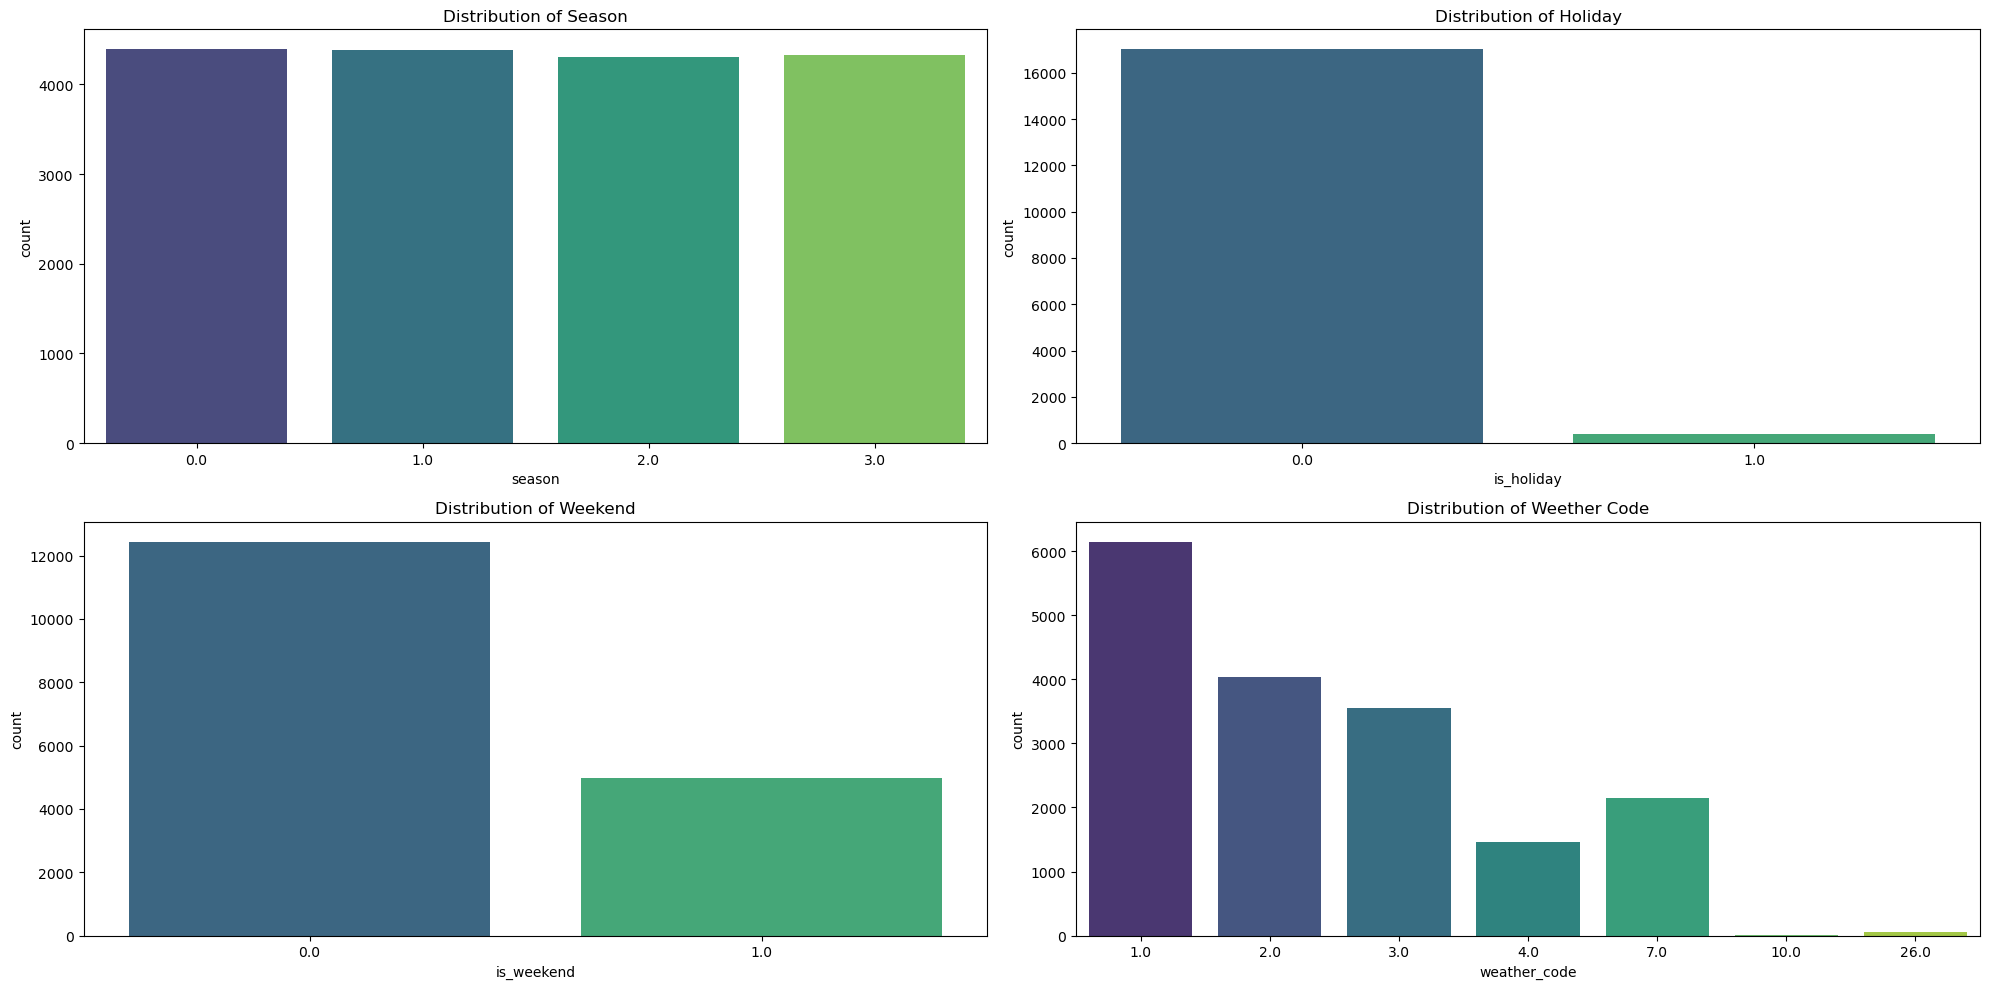

In [9]:
plt.figure(figsize=(20,10))

 #plot season
plt.subplot(2, 2, 1)
sns.countplot(x='season', data=df, palette='viridis')
plt.title('Distribution of Season', color='black')

#Plot of Holiday
plt.subplot(2, 2, 2)
sns.countplot(x='is_holiday', data=df, palette='viridis')
plt.title('Distribution of Holiday', color = 'black')

#Plot of Weekend
plt.subplot(2, 2, 3)
sns.countplot(x='is_weekend', data=df, palette='viridis')
plt.title('Distribution of Weekend', color = 'black')


#Plot of Weateher Code
plt.subplot(2, 2, 4)
sns.countplot(x='weather_code', data=df, palette='viridis')
plt.title('Distribution of Weether Code', color= 'black')

plt.tight_layout()
plt.show()


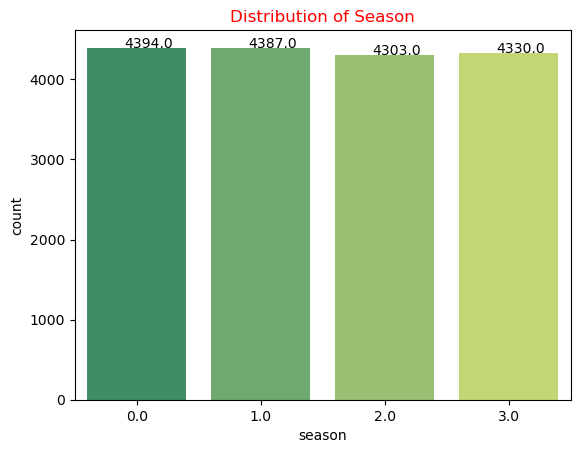

In [10]:
# Plot is Seasons
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'season', palette="summer")
ax.set_title("Distribution of Season", color="red")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6))

plt.show()

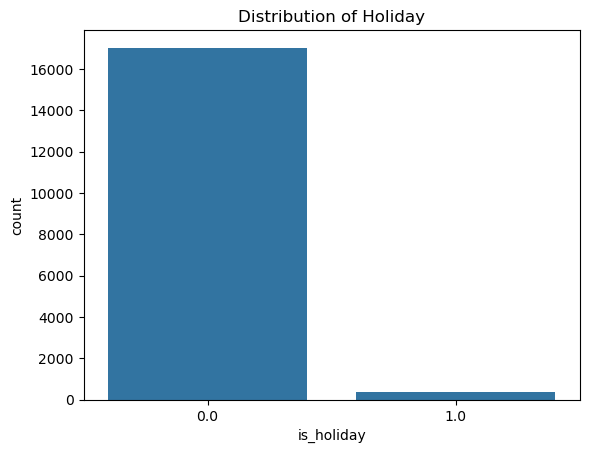

In [11]:
# Plot is holiday
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'is_holiday')
ax.set_title("Distribution of Holiday", color="black")

plt.show()

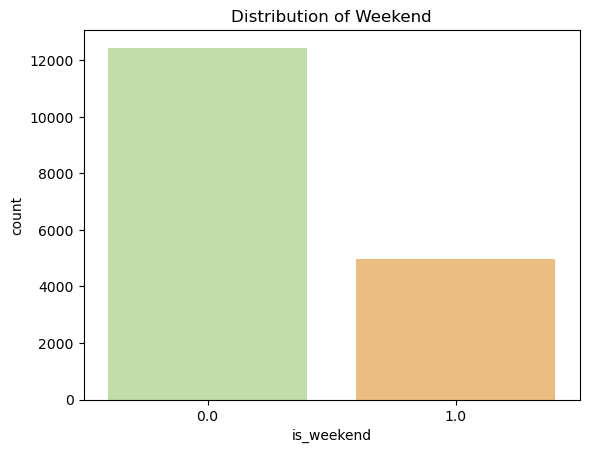

In [12]:
# Plot of Weekend
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'is_weekend',palette="Spectral_r")
ax.set_title("Distribution of Weekend", color="black")


plt.show()

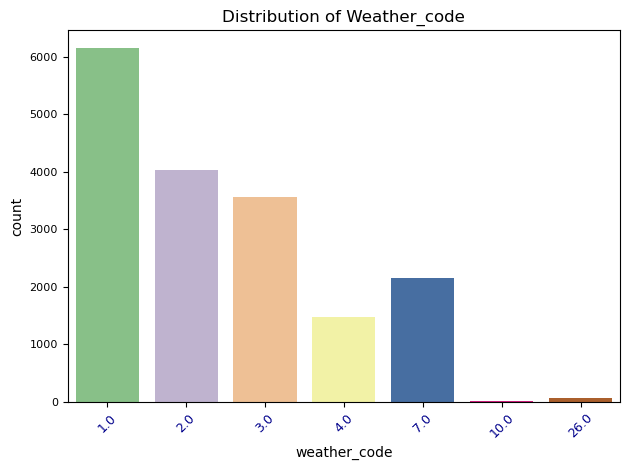

In [13]:
# Plot of Weather_code
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "weather_code", palette="Accent")

    
plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=8)
ax.set_title("Distribution of Weather_code", color= "black")
plt.tight_layout()
plt.show()

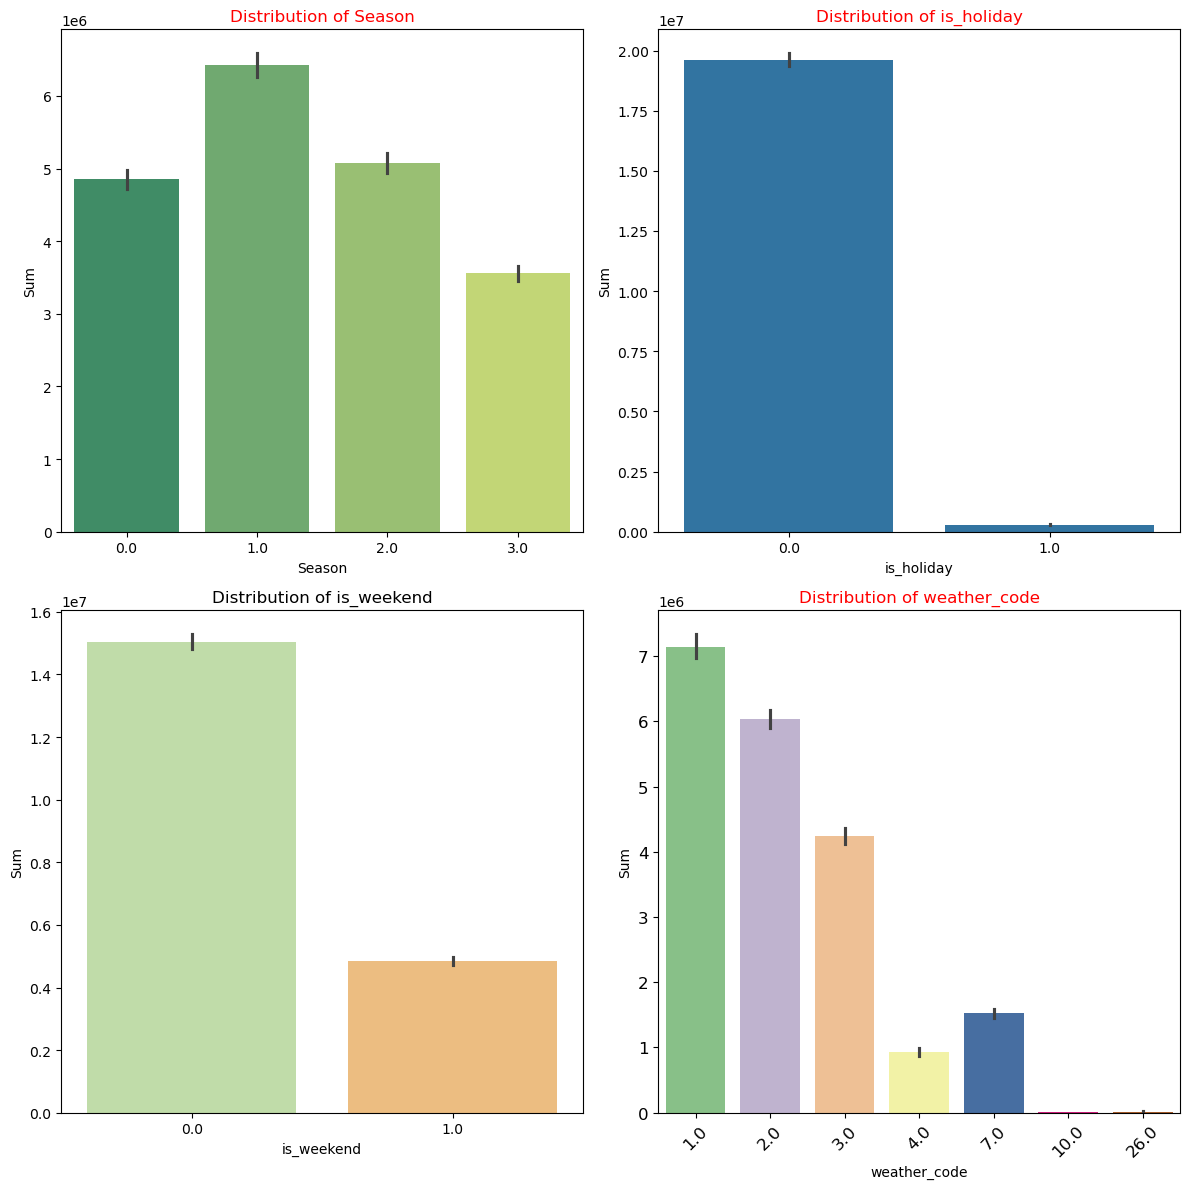

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))


#Plot by Holiday
sns.barplot(data=df, x='is_holiday', y='cnt', estimator=sum, ax=ax[0][1])
ax[0][1].set_xlabel('is_holiday')
ax[0][1].set_ylabel('Sum')
ax[0][1].set_title('Distribution of is_holiday', color="red")

                  
                  
    
    #Plot by Season
sns.barplot(data=df, x="season", y='cnt', estimator=sum, ax=ax[0][0], palette="summer")
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Sum')
ax[0][0].set_title('Distribution of Season', color="red")




#Plot by Weekend
sns.barplot(data=df, x='is_weekend', y='cnt', estimator=sum, ax=ax[1][0], palette="Spectral_r")
ax[1][0].set_xlabel('is_weekend')
ax[1][0].set_ylabel('Sum')
ax[1][0].set_title('Distribution of is_weekend', color= "black")




#Plot by weather code
sns.barplot(data=df, x="weather_code", y='cnt', estimator=sum, ax=ax[1][1], palette="Accent")
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Sum')
ax[1][1].set_title('Distribution of weather_code', color="red")
ax[1][1].tick_params(axis='x', labelsize=12, rotation=45)
ax[1][1].tick_params(axis='y', labelsize=12)






plt.tight_layout()
plt.show()

In [15]:
# While bicycle use reaches the highest value in Clear and partly Cloudy Weather,
#It reaches the lowest value in Rainy, Snowy and Stormy Weather.

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

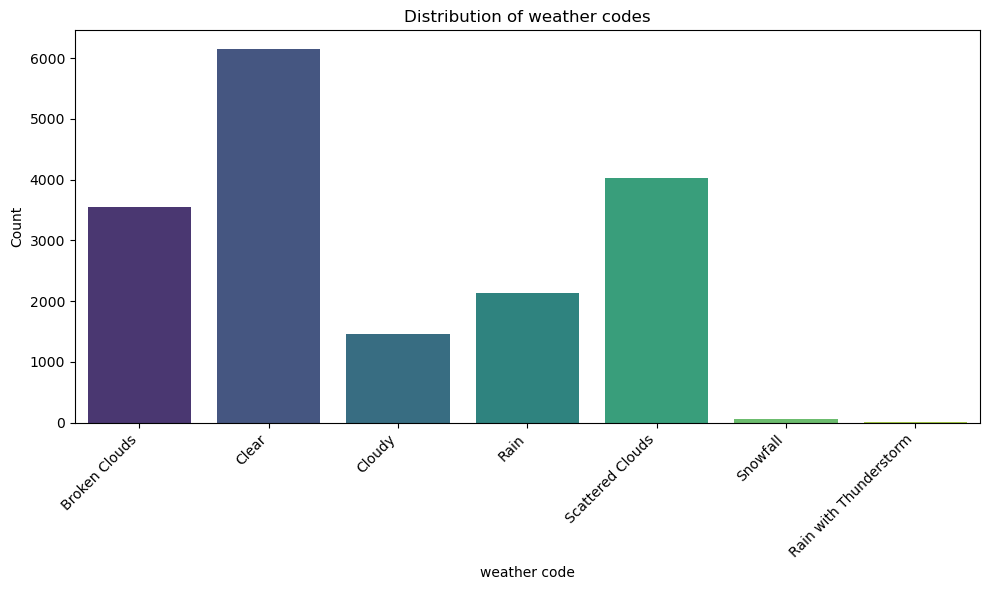

In [17]:
weather_codes = { 1: "Clear",
                  2: "Scattered Clouds",
                  3: "Broken Clouds",
                  4: "Cloudy",
                  7: "Rain",
                  10: "Rain with Thunderstorm",
                  26: "Snowfall",
                  94: "Freezing Fog"}
df['weather_code'] = df['weather_code'].map(weather_codes)
plt.figure(figsize=(10,6))
sns.countplot(x='weather_code', data=df, palette='viridis')
plt.title("Distribution of weather codes")
plt.xlabel("weather code")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [18]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,3.0


In [19]:

df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [20]:
df['timestamp']

0        2015-01-04 00:00:00
1        2015-01-04 01:00:00
2        2015-01-04 02:00:00
3        2015-01-04 03:00:00
4        2015-01-04 04:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object

In [21]:
type(df['timestamp'][0])

str

In [22]:
df['timestamp'] =pd.to_datetime(df['timestamp'], errors='coerce')

In [23]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code            object
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [24]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [25]:
df.set_index("timestamp", inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken Clouds,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

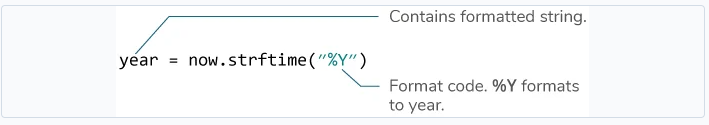

In [26]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [27]:
df.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='timestamp', length=17414)

In [28]:
df.index.max()-df.index.min()

Timedelta('730 days 23:00:00')

In [29]:
df.index.year.max()- df.index.year.min()

2

In [30]:
f = lambda x:x.strftime("%Y-%m")

In [31]:
df['year_month'] =f(df.index)
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['hour'] = df.index.hour
df['month'] = df.index.month
df['year'] = df.index.year
# Monday=0, Sunday=6

In [32]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
df['season'] = df['month'].apply(get_season)

In [33]:
df.head()
    

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter,2015-01,6,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015-01,6,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,2015-01,6,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,2015-01,6,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,2015-01,6,4,4,1,2015


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  object 
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  object 
 9   year_month    17414 non-null  object 
 10  day_of_week   17414 non-null  int32  
 11  day_of_month  17414 non-null  int32  
 12  hour          17414 non-null  int32  
 13  month         17414 non-null  int32  
 14  year          17414 non-null  int32  
dtypes: float64(6), int32(5), int64(1), object(3)
memory usage: 1.8+ MB


In [35]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter,2015-01,6,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,2015-01,6,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,2015-01,6,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,2015-01,6,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,2015-01,6,4,4,1,2015


In [ ]:
current_year = datetime.now().strftime("%Y")
df['year'] =current_year

In [ ]:
df['timestamp'].dt.strftime('%Y'-'%m')

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [36]:
corr_matrix = df.corr()

ValueError: could not convert string to float: 'Broken Clouds'

In [37]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['weather_code', 'season', 'year_month'], dtype='object')


In [38]:
for column in non_numeric_columns:
    print(f"\nUnique values in'{column}':")
    print(df[column].unique())


Unique values in'weather_code':
['Broken Clouds' 'Clear' 'Cloudy' 'Rain' 'Scattered Clouds' 'Snowfall'
 'Rain with Thunderstorm']

Unique values in'season':
['Winter' 'Spring' 'Summer' 'Fall']

Unique values in'year_month':
['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11' '2015-12' '2016-01' '2016-02'
 '2016-03' '2016-04' '2016-05' '2016-06' '2016-07' '2016-08' '2016-09'
 '2016-10' '2016-11' '2016-12' '2017-01']


In [39]:
df_cleaned = df.drop(columns=non_numeric_columns)
df_cleaned

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,4,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,1,3,19,1,2017
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,1,3,20,1,2017
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,1,3,21,1,2017


In [40]:
corr_matrix = df_cleaned.corr()

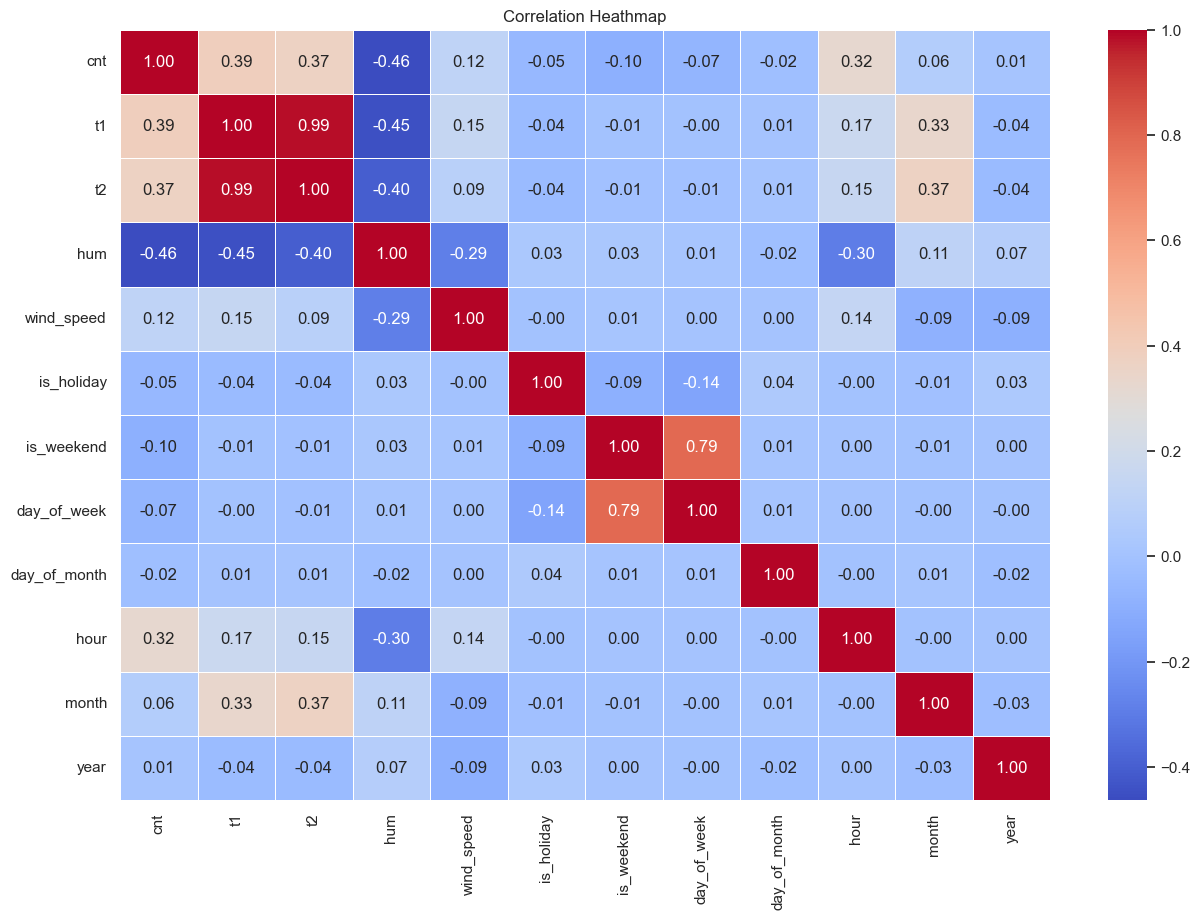

In [41]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heathmap")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

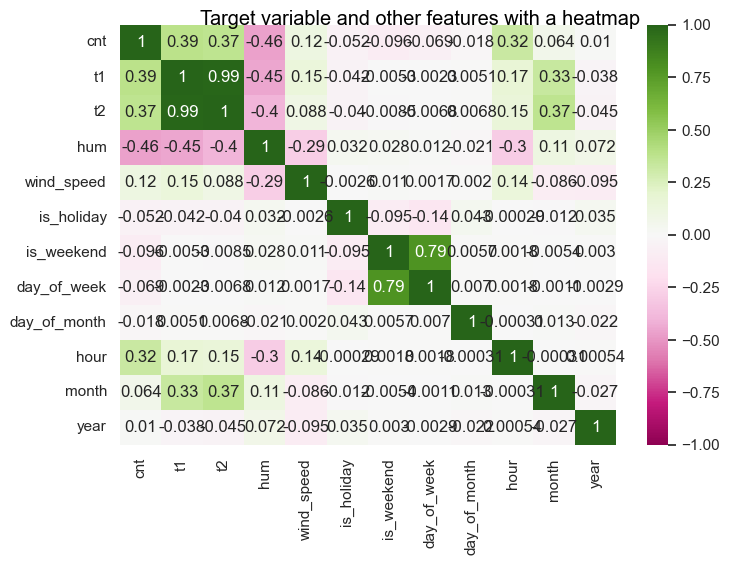

In [48]:
plt.figure(figsize=(8, 5))
plt.suptitle('Target variable and other features with a heatmap', color="black")
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.subplots_adjust(top=0.95)
plt.show

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day_of_month'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['season'] = (df['timestamp'].dt.month%12 + 3)//3
df['year'] = current_year
df.head()

In [ ]:
correlation_matrix = df.corr()

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y="cnt", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.index, y="cnt", data=df)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [ ]:
sns.lineplot(data = df, x = 'hour', y = 'cnt')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_shares[hourly_shares['is_holiday'] == 1], x='hour', y ='cnt', hue='is_holiday')
plt.title('Bike Shares by Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.legend(title='Holiday')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_shares[hourly_shares['is_weekend'] == 1], x='hour', y ='cnt', hue='is_weekend')
plt.title('Bike Shares by Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.legend(title='Weekend')
plt.grid(True)
plt.show()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(16, 12))
sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)

sns.pointplot(data=df, x='hour', y='cnt', ax=ax2, hue='is_holiday', palette="cool")

sns.pointplot(data=df, x='hour', y='cnt', ax=ax3, hue='is_weekend', palette="summer")

sns.pointplot(data=df, x='hour', y='cnt', ax=ax4, hue='season', palette="winter", 
             markers=["o", "s", "*", "v"], linestyles=["-", "--", "--", "-"])
plt.suptitle("Plot bike shares by hours on holidays, weekend, season", color = "black", fontsize= 13, 
            fontweight="bold")
plt.subplots_adjust(top=0.90)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

In [ ]:
plt.figure(figsize=(14,6))
plt.title("Bike shares by day of week", color= "black", fontsize = 10)
sns.barplot(x="day_of_week", y = 'cnt', data=df, hue="is_weekend")
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))
plt.title("Bike shares by day of week or holiday", color= "black", fontsize=13)
sns.barplot(x="day_of_week", y='cnt', data=df, hue="is_holiday")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

In [ ]:
fig

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |